<a href="https://colab.research.google.com/github/Palak-08/EDA/blob/main/21BDS0100_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 1: Loading, Exploring, and Cleaning the Dataset

Step 1: Loading the Dataset, Exploring Dimensions, Summary, and Data Handling

1.1 Load Dataset

We’ll load the dataset from the provided URL using pandas.

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/NaturalGas.csv"
df = pd.read_csv(url)

# Display the first few rows
print(df.head())


   rownames state  statecode  year  consumption  price  eprice  oprice  \
0         1    NY         35  1967       313656   1.42    2.98    7.40   
1         2    NY         35  1968       319282   1.38    2.91    7.77   
2         3    NY         35  1969       331326   1.37    2.84    7.96   
3         4    NY         35  1970       346533   1.40    2.87    8.33   
4         5    NY         35  1971       352085   1.50    3.07    8.80   

   lprice  heating    income  
0    1.47     6262  10903.75  
1    1.42     6125  11370.02  
2    1.38     6040  11578.68  
3    1.37     6085  11586.77  
4    1.40     5907  11657.42  


1.2 Explore Dimensions and Summary

Let’s explore the dataset's dimensions, column names, and summary statistics.

In [ ]:
# Explore dimensions
print("Shape of the dataset:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

# Summary statistics
print(df.describe())

# Data types
print(df.info())

Shape of the dataset: (138, 11)
Columns: ['rownames', 'state', 'statecode', 'year', 'consumption', 'price', 'eprice', 'oprice', 'lprice', 'heating', 'income']
         rownames  statecode         year    consumption       price  \
count  138.000000  138.00000   138.000000     138.000000  138.000000   
mean    69.500000   27.00000  1978.000000  252901.478261    3.422319   
std     39.981246   15.68811     6.657415  184478.131559    2.169215   
min      1.000000    5.00000  1967.000000    9430.000000    0.680000   
25%     35.250000   10.00000  1972.000000   49103.500000    1.380000   
50%     69.500000   29.00000  1978.000000  300835.500000    2.775000   
75%    103.750000   44.00000  1984.000000  346428.750000    5.310000   
max    138.000000   45.00000  1989.000000  637289.000000    8.060000   

           eprice      oprice      lprice      heating        income  
count  138.000000  138.000000  138.000000   138.000000    138.000000  
mean     5.053551   24.635580    3.207681  4154.52

1.3 Data Handling: Check and Fill Missing Values

We’ll check for missing values and fill numeric columns with the median and non-numeric columns with the mode.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing non-numeric columns with mode
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna(df[non_numeric_cols].mode().iloc[0])

# Verify no missing values remain
print(df.isnull().sum())

rownames       0
state          0
statecode      0
year           0
consumption    0
price          0
eprice         0
oprice         0
lprice         0
heating        0
income         0
dtype: int64
rownames       0
state          0
statecode      0
year           0
consumption    0
price          0
eprice         0
oprice         0
lprice         0
heating        0
income         0
dtype: int64


Step 2: Data Cleaning and Handling

2.1 Removing Duplicates

We’ll check for and remove duplicate rows.

In [ ]:
# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Verify duplicates are removed
print("Number of duplicates after removal:", df.duplicated().sum())

Number of duplicates: 0
Number of duplicates after removal: 0


2.2 Outlier Detection and Filtering

We’ll detect outliers using the IQR method and filter them out.

In [ ]:
# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Detect outliers in numeric columns
outliers = {}
for col in numeric_cols:
    outliers[col] = detect_outliers(df[col])

# Display outliers
for col, outlier_values in outliers.items():
    print(f"Outliers in {col}: {len(outlier_values)}")

# Filter out outliers
df = df[~df[numeric_cols].apply(lambda x: x.isin(detect_outliers(x))).any(axis=1)]

Outliers in rownames: 0
Outliers in statecode: 0
Outliers in year: 0
Outliers in consumption: 0
Outliers in price: 0
Outliers in eprice: 0
Outliers in oprice: 0
Outliers in lprice: 0
Outliers in heating: 0
Outliers in income: 2


Step 3: Univariate Analysis

3.1 Histogram

We’ll create histograms for numeric columns.

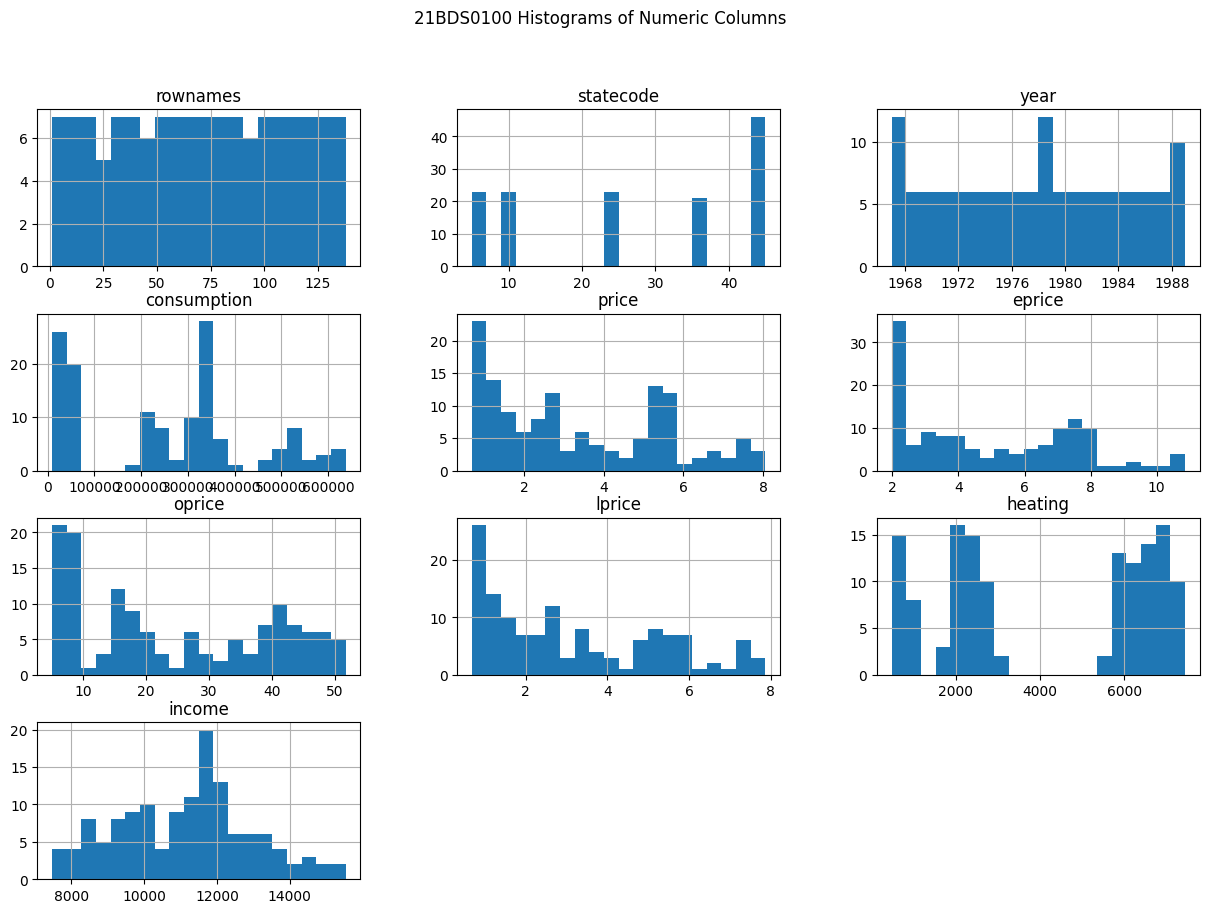

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("21BDS0100 Histograms of Numeric Columns")
plt.show()

3.2 Density Plot for area_mean

We’ll create a density plot for a specific column (e.g., consumption).

<ipython-input-10-0ff900aa88bb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['consumption'], shade=True)


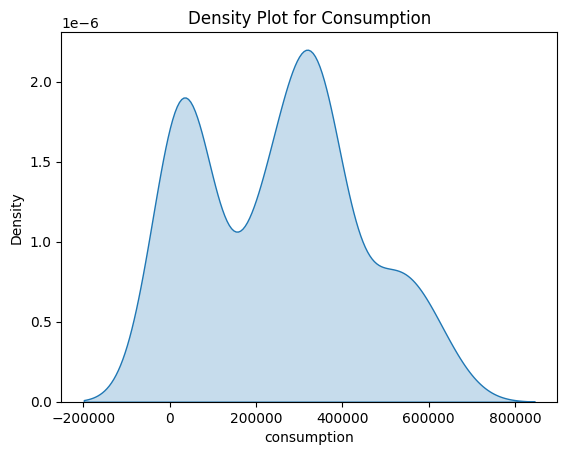

In [ ]:
# Density plot for consumption
sns.kdeplot(df['consumption'], shade=True)
plt.title("21BDS0100 Density Plot for Consumption")
plt.show()

3.3 Box Plot for area_mean

We’ll create a box plot for a specific column (e.g., price).

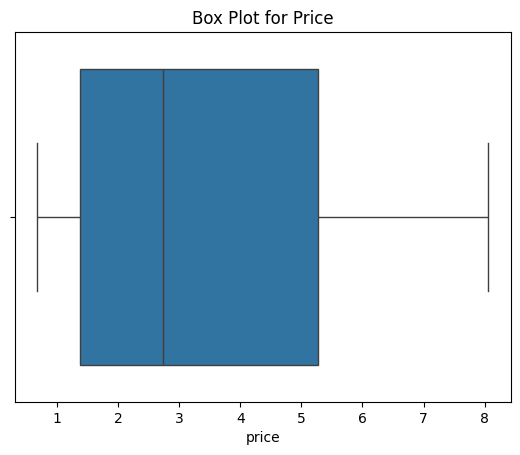

In [ ]:
# Box plot for price
sns.boxplot(x=df['price'])
plt.title("21BDS0100 Box Plot for Price")
plt.show()

3.4 Bar Plot for Diagnosis

3.5 Pie Plot for Diagnosis

3.6 Dotplot

We’ll create a dot plot for a specific column (e.g., income).

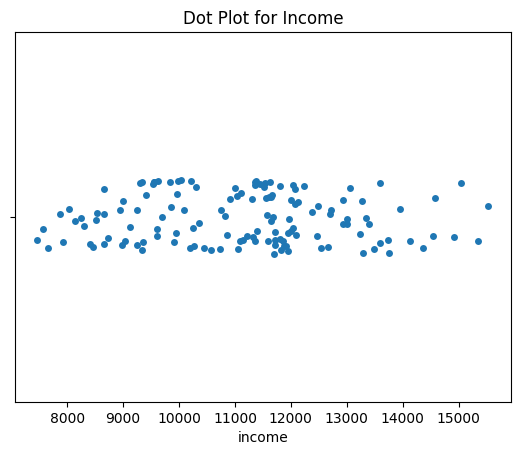

In [ ]:
# Dot plot for income
sns.stripplot(x=df['income'], jitter=True)
plt.title("21BDS0100 Dot Plot for Income")
plt.show()

3.7 Boxplot

We’ll create a box plot for all numeric columns.

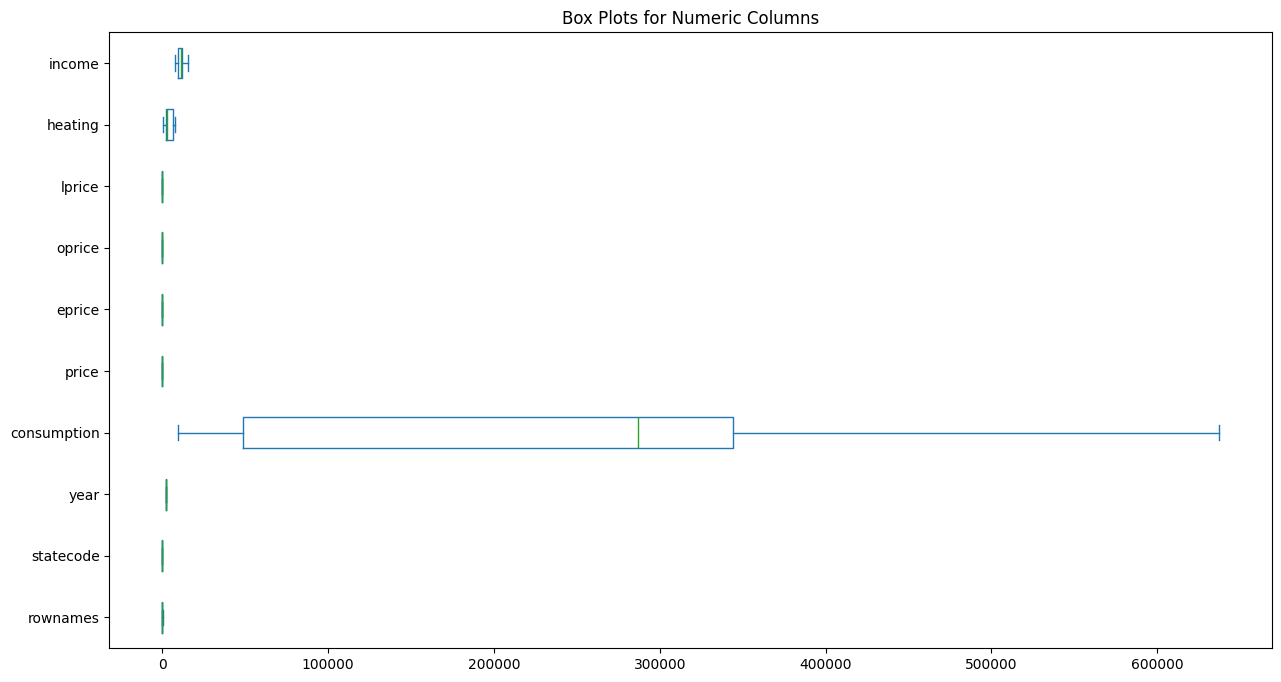

In [ ]:
# Box plot for all numeric columns
df[numeric_cols].plot(kind='box', figsize=(15, 8), vert=False)
plt.title("21BDS0100 Box Plots for Numeric Columns")
plt.show()

Step 4: Bivariate Analysis
4.1 Create a Contingency Table

We’ll create a contingency table for categorical variables (e.g., state and year).

In [ ]:
# Contingency table for state and year
contingency_table = pd.crosstab(df['state'], df['year'])
print(contingency_table)

year   1967  1968  1969  1970  1971  1972  1973  1974  1975  1976  ...  1980  \
state                                                              ...         
CA        1     1     1     1     1     1     1     1     1     1  ...     1   
FL        1     1     1     1     1     1     1     1     1     1  ...     1   
MI        1     1     1     1     1     1     1     1     1     1  ...     1   
NY        1     1     1     1     1     1     1     1     1     1  ...     1   
TX        1     1     1     1     1     1     1     1     1     1  ...     1   
UT        1     1     1     1     1     1     1     1     1     1  ...     1   

year   1981  1982  1983  1984  1985  1986  1987  1988  1989  
state                                                        
CA        1     1     1     1     1     1     1     1     1  
FL        1     1     1     1     1     1     1     1     1  
MI        1     1     1     1     1     1     1     1     1  
NY        1     1     1     1     1     1     1  

4.2 Categorical vs. Categorical Analysis

We’ll analyze relationships between categorical variables.
4.2.1 Stacked Bar Chart

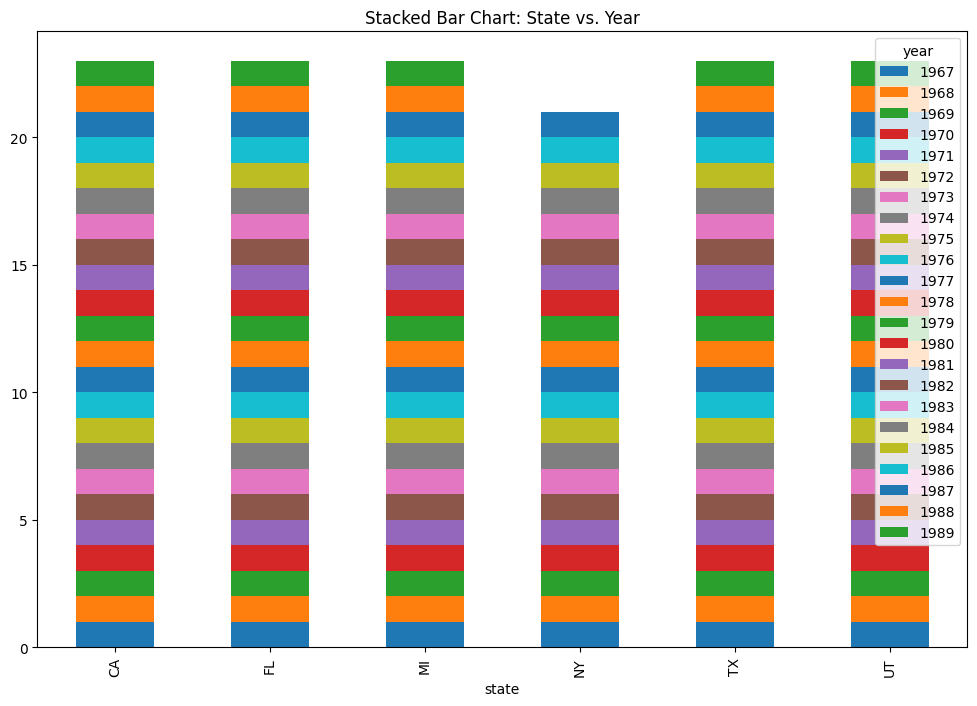

In [ ]:
# Stacked bar chart for state and year
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title(" 21BDS0100 Stacked Bar Chart: State vs. Year")
plt.show()

4.2.2 Stacked Bar Plot with Seaborn

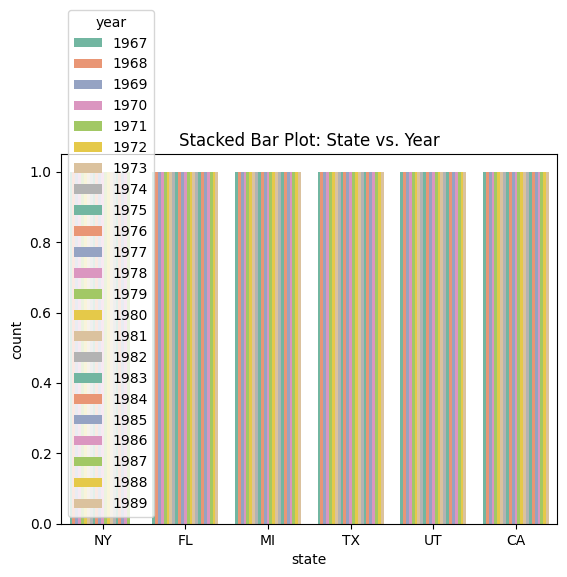

In [ ]:
# Stacked bar plot with Seaborn
sns.countplot(x='state', hue='year', data=df, palette='Set2')
plt.title("21BDS0100 Stacked Bar Plot: State vs. Year")
plt.show()

4.2.3 Grouped Bar Plot

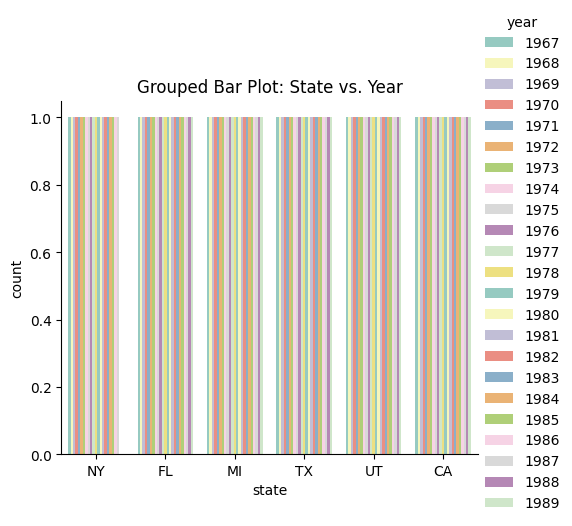

In [ ]:
# Grouped bar plot
sns.catplot(x='state', hue='year', kind='count', data=df, palette='Set3')
plt.title("21BDS0100 Grouped Bar Plot: State vs. Year")
plt.show()

Step 4: Bivariate Analysis (Continued)

4.3 Categorical vs. Quantitative Analysis

4.3.1 Bar Chart

We’ll create a bar chart to compare a categorical variable (e.g., state) with a quantitative variable (e.g., consumption).

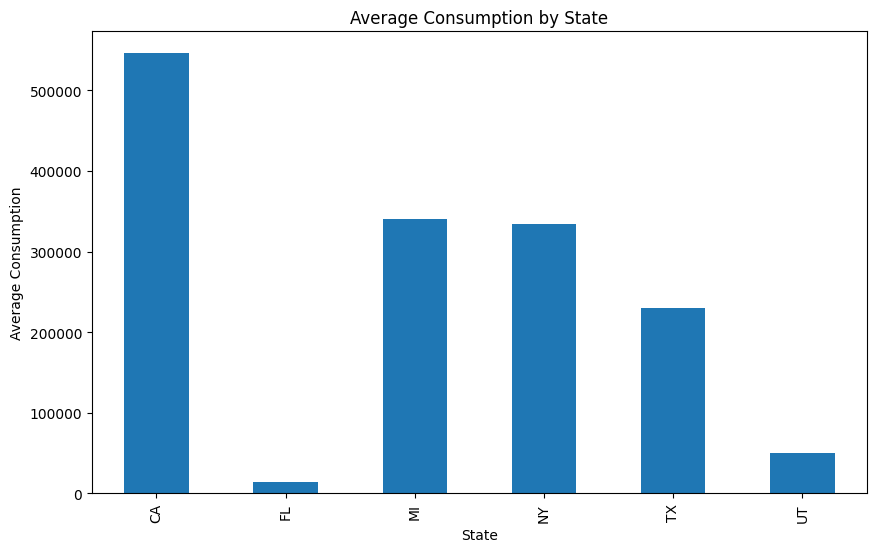

In [ ]:
# Bar chart: Average consumption by state
df.groupby('state')['consumption'].mean().plot(kind='bar', figsize=(10, 6))
plt.title("21BDS0100 Average Consumption by State")
plt.xlabel("State")
plt.ylabel("Average Consumption")
plt.show()

4.3.2 Density Plot

We’ll create a density plot to compare the distribution of a quantitative variable (e.g., price) across categories (e.g., state).

<ipython-input-20-1b3d01eec283>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='price', hue='state', shade=True)


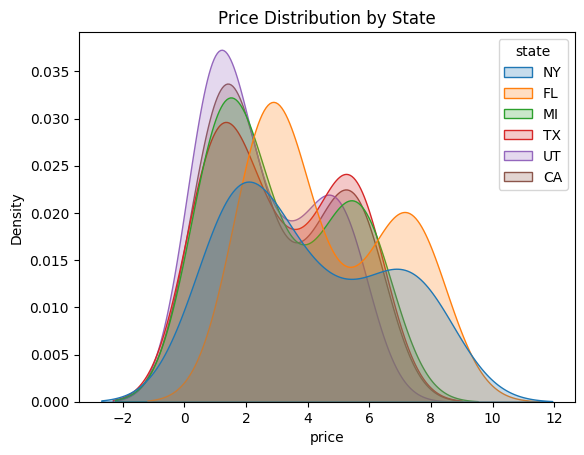

In [ ]:
# Density plot: Price distribution by state
sns.kdeplot(data=df, x='price', hue='state', shade=True)
plt.title("21BDS0100 Price Distribution by State")
plt.show()

4.3.3 Box Plot

We’ll create a box plot to compare a quantitative variable (e.g., income) across categories (e.g., state).

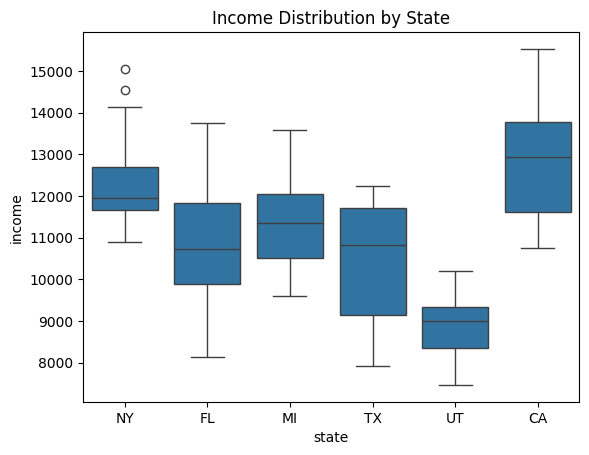

In [ ]:
# Box plot: Income by state
sns.boxplot(x='state', y='income', data=df)
plt.title("21BDS0100 Income Distribution by State")
plt.show()

4.3.4 Violin Plot

We’ll create a violin plot to visualize the distribution of a quantitative variable (e.g., consumption) across categories (e.g., state).

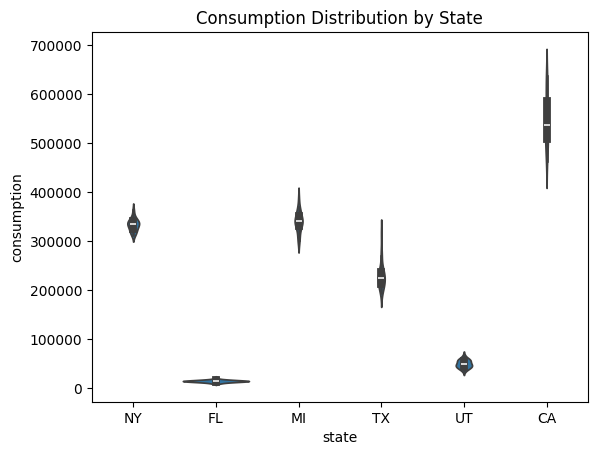

In [ ]:
# Violin plot: Consumption by state
sns.violinplot(x='state', y='consumption', data=df)
plt.title("21BDS0100 Consumption Distribution by State")
plt.show()

4.3.5 Combined Violin and Box Plots

We’ll combine violin and box plots for better visualization.

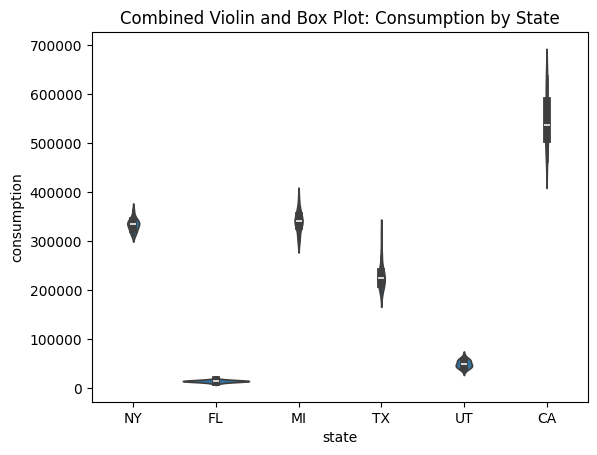

In [ ]:
# Combined violin and box plot
sns.violinplot(x='state', y='consumption', data=df, inner='box')
plt.title("21BDS0100 Combined Violin and Box Plot: Consumption by State")
plt.show()

4.4 Quantitative vs. Quantitative Analysis

4.4.1 Line Plot

We’ll create a line plot to visualize trends over time (e.g., year vs. consumption).

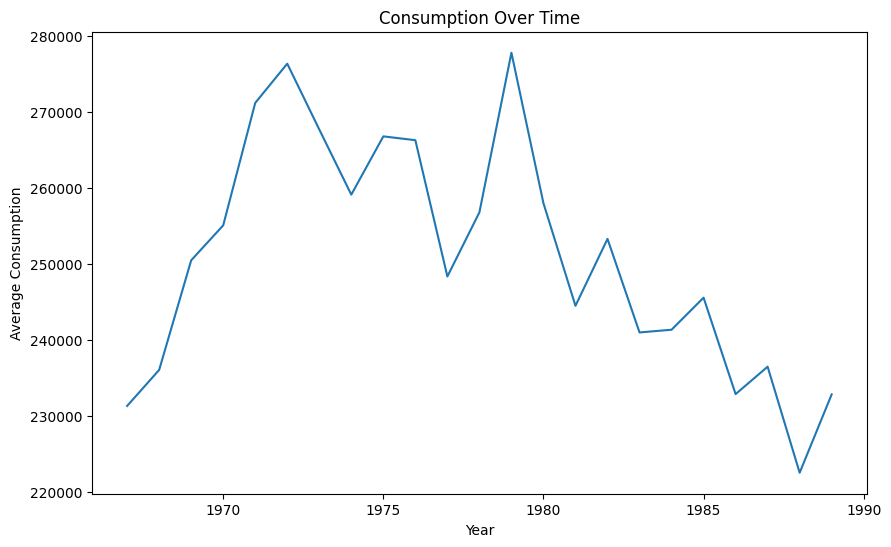

In [ ]:
# Line plot: Consumption over time
df.groupby('year')['consumption'].mean().plot(kind='line', figsize=(10, 6))
plt.title("21BDS0100 Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Average Consumption")
plt.show()

4.4.2 Correlation Heatmap

We’ll create a correlation heatmap to visualize relationships between numeric variables.

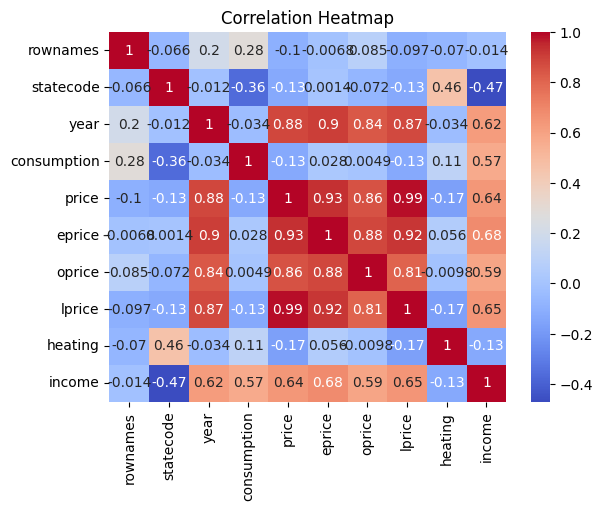

In [ ]:
# Correlation heatmap
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("21BDS0100 Correlation Heatmap")
plt.show()

4.4.3 Scatter Plot

We’ll create a scatter plot to visualize the relationship between two quantitative variables (e.g., price vs. consumption).

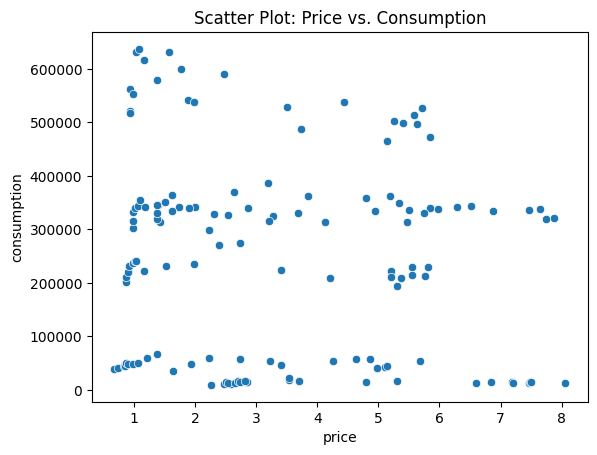

In [ ]:
# Scatter plot: Price vs. Consumption
sns.scatterplot(x='price', y='consumption', data=df)
plt.title("21BDS0100 Scatter Plot: Price vs. Consumption")
plt.show()

Step 5: Multivariate Analysis

5.1 Scatter Plot with Color as a Third Variable

We’ll create a scatter plot with color representing a third variable (e.g., state).

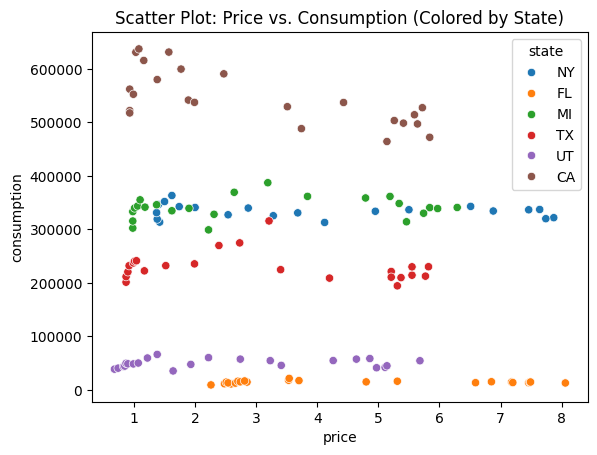

In [ ]:
# Scatter plot: Price vs. Consumption, colored by State
sns.scatterplot(x='price', y='consumption', hue='state', data=df)
plt.title("21BDS0100 Scatter Plot: Price vs. Consumption (Colored by State)")
plt.show()

5.2 Scatter Plot with Color and Shape as Variables

We’ll create a scatter plot with color and shape representing different variables (e.g., state and year).

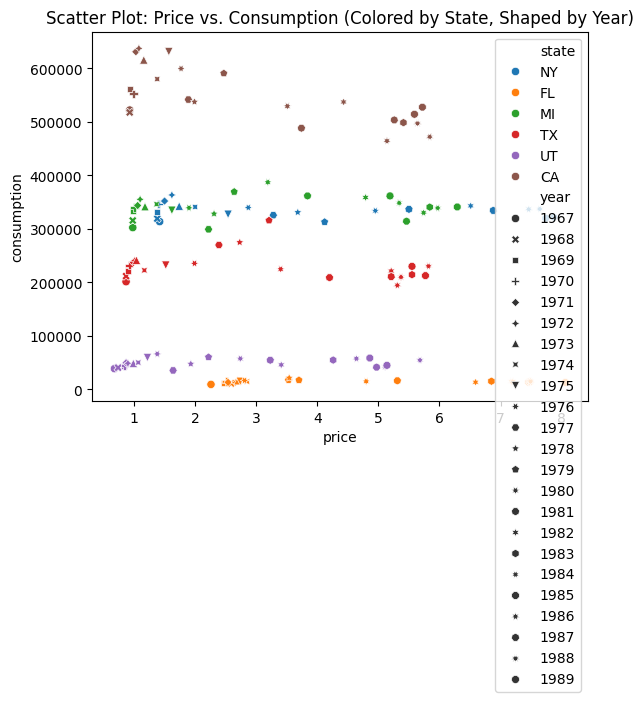

In [ ]:
# Scatter plot: Price vs. Consumption, colored by State and shaped by Year
sns.scatterplot(x='price', y='consumption', hue='state', style='year', data=df)
plt.title("21BDS0100 Scatter Plot: Price vs. Consumption (Colored by State, Shaped by Year)")
plt.show()

5.3 Scatter Plot with Color and Size as Variables

We’ll create a scatter plot with color and size representing different variables (e.g., state and income)

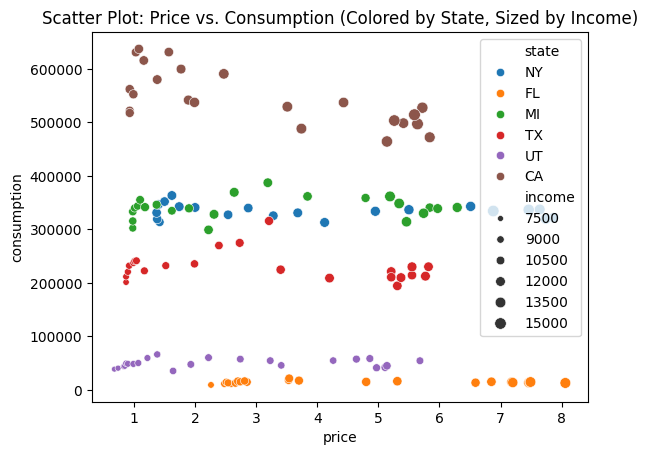

In [ ]:
# Scatter plot: Price vs. Consumption, colored by State and sized by Income
sns.scatterplot(x='price', y='consumption', hue='state', size='income', data=df)
plt.title("21BDS0100 Scatter Plot: Price vs. Consumption (Colored by State, Sized by Income)")
plt.show()

5.4 Bubble Plot

We’ll create a bubble plot to visualize three quantitative variables (e.g., price, consumption, and income).

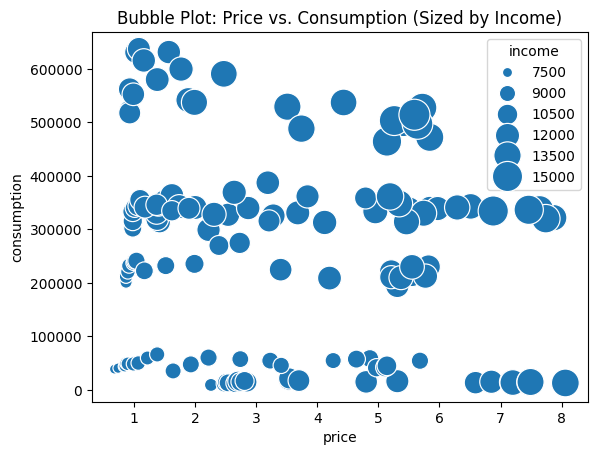

In [ ]:
# Bubble plot: Price vs. Consumption, sized by Income
sns.scatterplot(x='price', y='consumption', size='income', sizes=(50, 500), data=df)
plt.title("21BDS0100 Bubble Plot: Price vs. Consumption (Sized by Income)")
plt.show()

5.5 Faceted Histogram

We’ll create a faceted histogram to visualize the distribution of a variable (e.g., consumption) across categories (e.g., state).

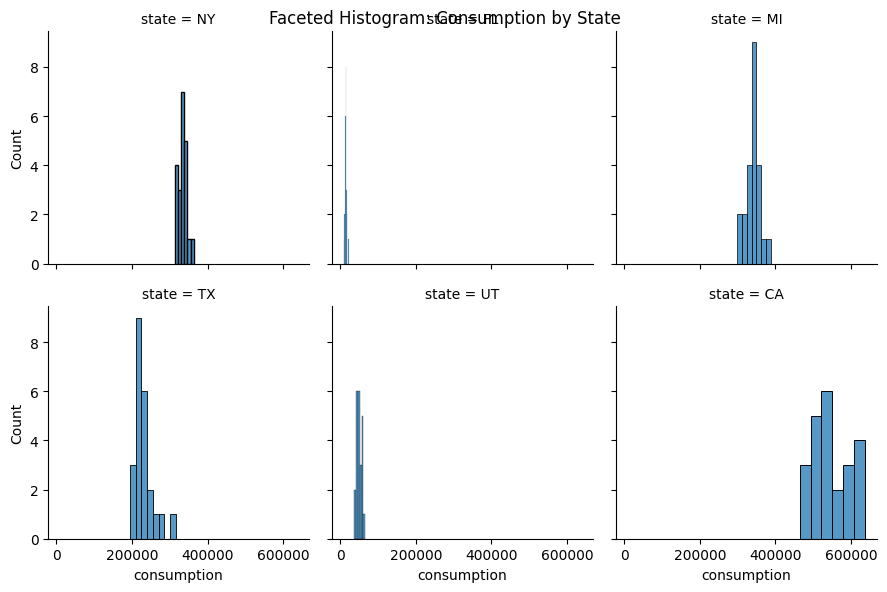

In [ ]:
# Faceted histogram: Consumption by State
g = sns.FacetGrid(df, col='state', col_wrap=3)
g.map(sns.histplot, 'consumption')
plt.suptitle("21BDS0100 Faceted Histogram: Consumption by State")
plt.show()

5.6 Pairplot

We’ll create a pairplot to visualize pairwise relationships between numeric variables.

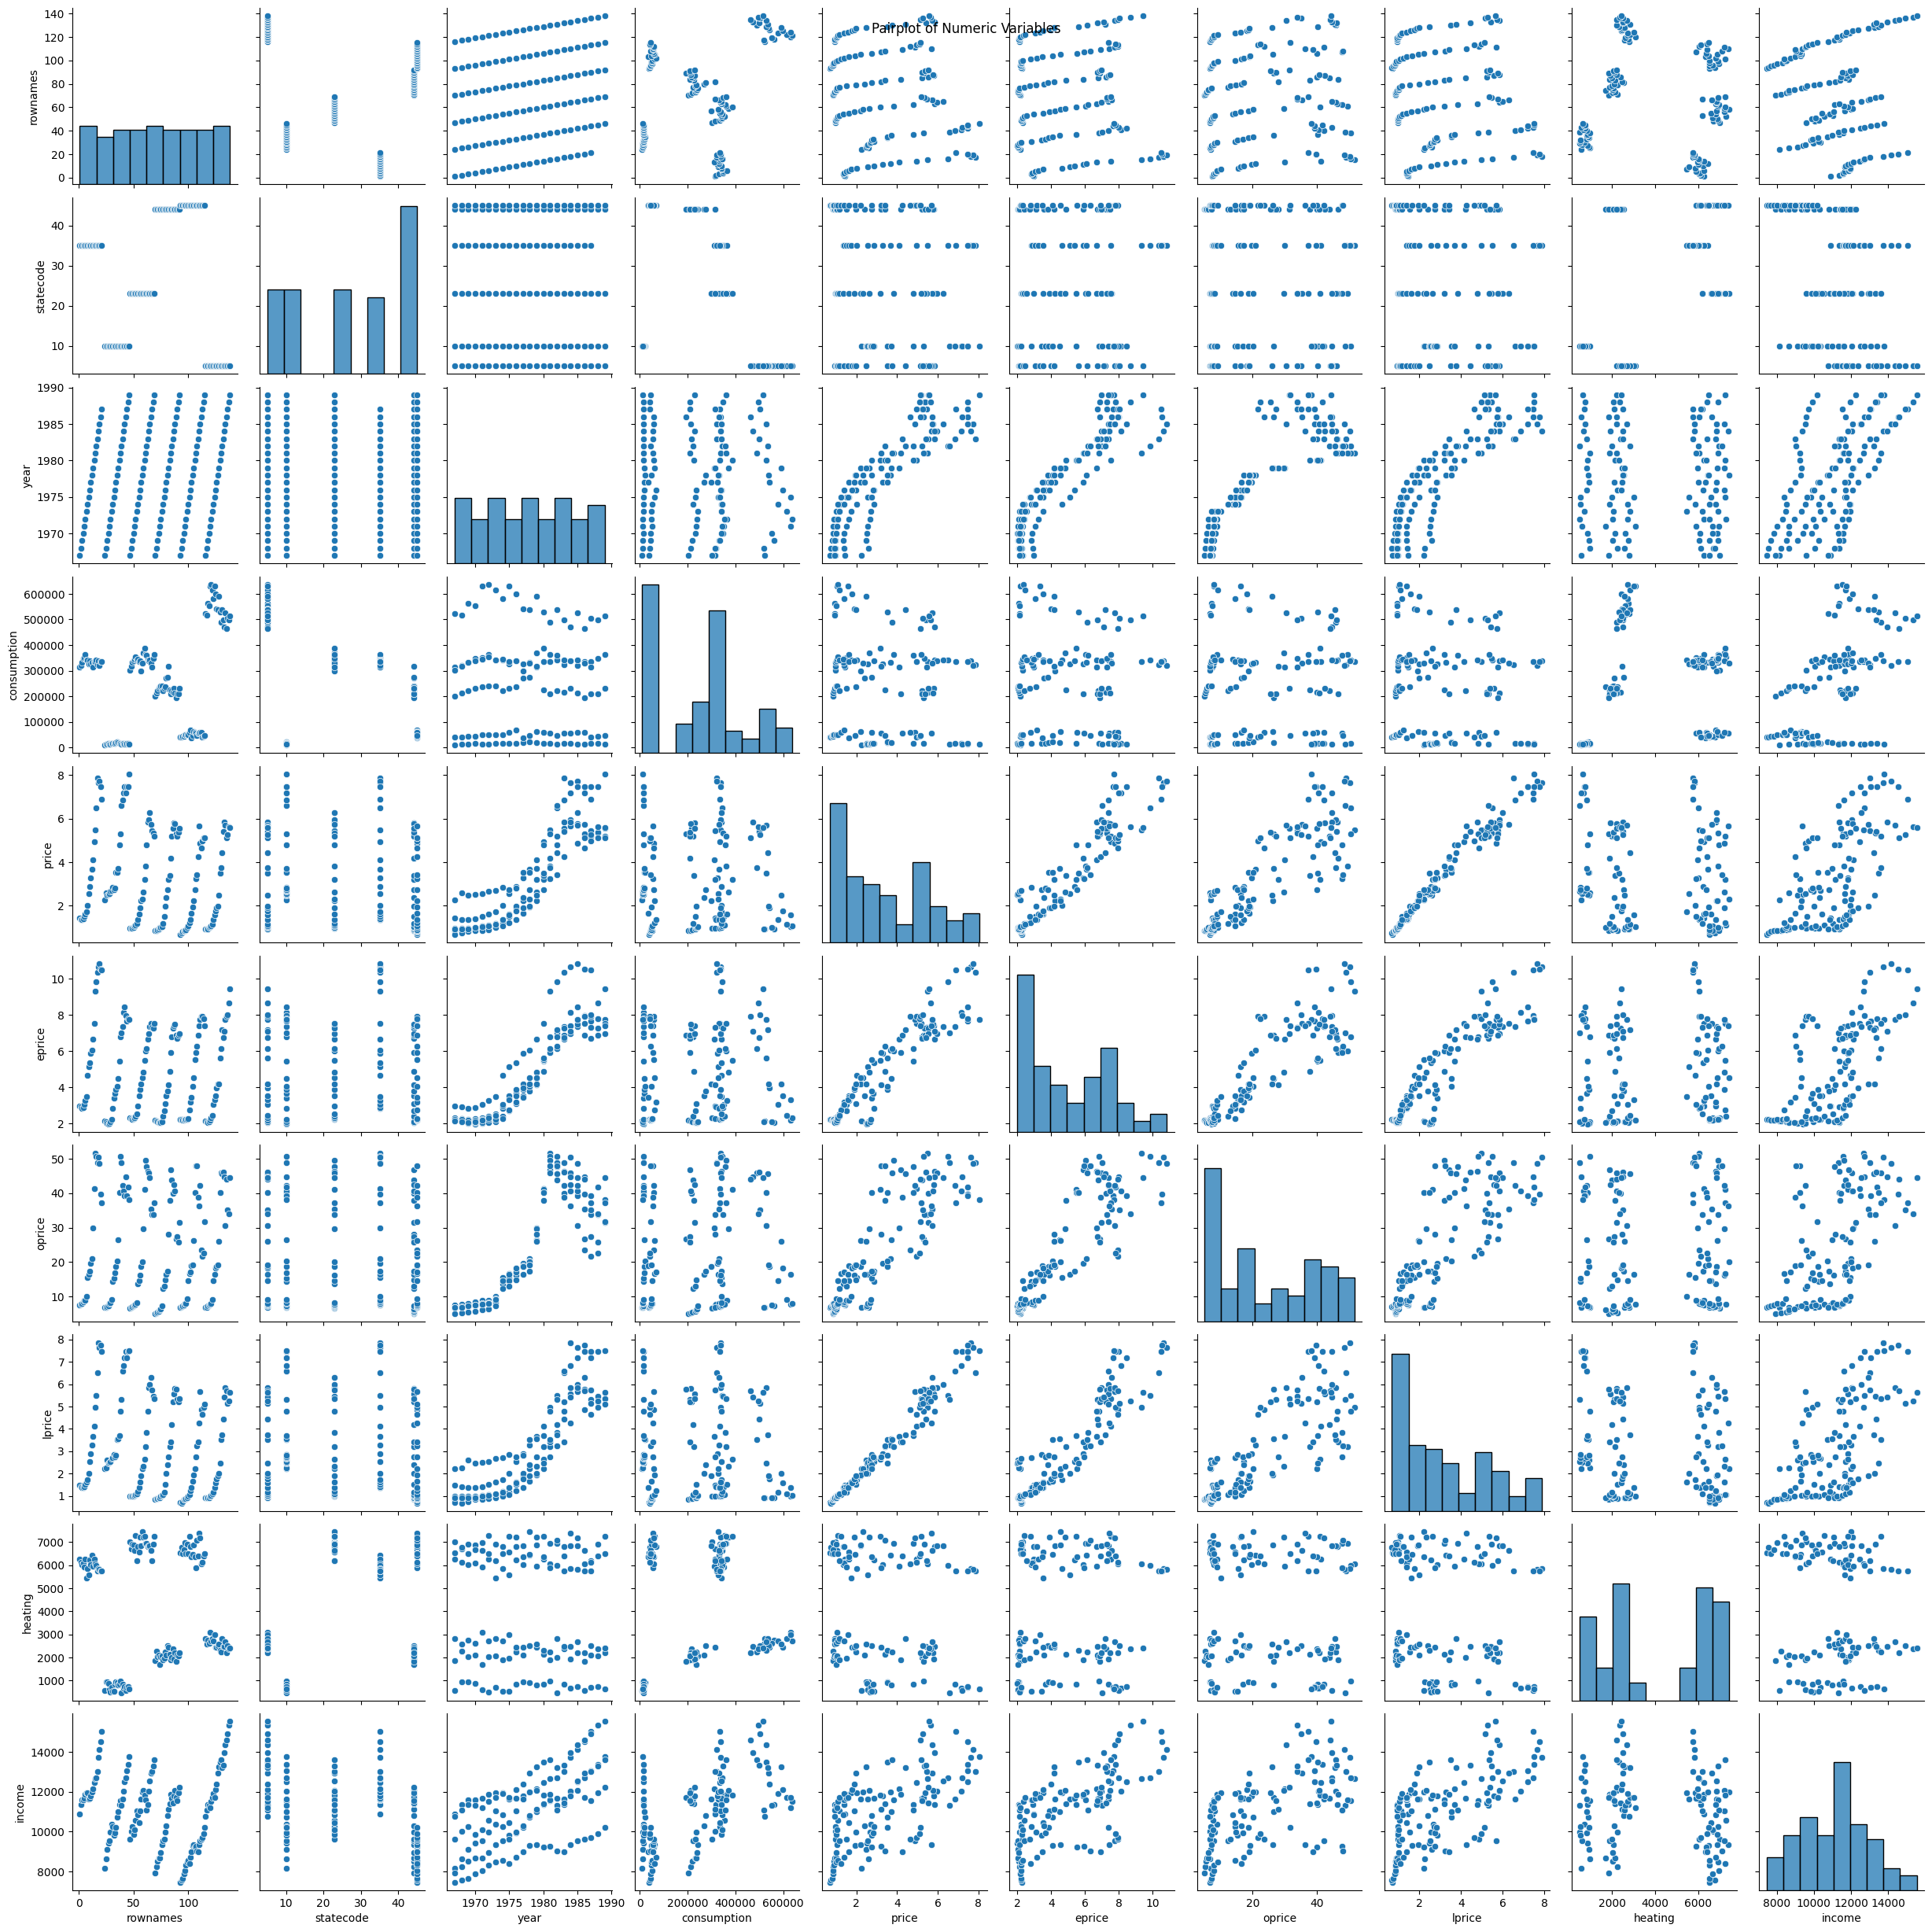

In [ ]:
# Pairplot
sns.pairplot(df[numeric_cols])
plt.suptitle("21BDS0100 Pairplot of Numeric Variables")
plt.show()

Module 2: Data Transformation

6.1 Merging Data

If you have another dataset to merge, let me know. Otherwise, we can skip this step.

6.2 Reshaping with Hierarchical Indexing

We’ll reshape the dataset using hierarchical indexing (e.g., state and year as indices).

In [ ]:
# Reshape with hierarchical indexing
df_hierarchical = df.set_index(['state', 'year'])
print(df_hierarchical.head())

            rownames  statecode  consumption  price  eprice  oprice  lprice  \
state year                                                                    
NY    1967         1         35       313656   1.42    2.98    7.40    1.47   
      1968         2         35       319282   1.38    2.91    7.77    1.42   
      1969         3         35       331326   1.37    2.84    7.96    1.38   
      1970         4         35       346533   1.40    2.87    8.33    1.37   
      1971         5         35       352085   1.50    3.07    8.80    1.40   

            heating    income  
state year                     
NY    1967     6262  10903.75  
      1968     6125  11370.02  
      1969     6040  11578.68  
      1970     6085  11586.77  
      1971     5907  11657.42  


6.3 Transformation Techniques

We’ll apply transformations like log, square root, or normalization.

In [ ]:
import numpy as np

# Log transformation
df['log_consumption'] = df['consumption'].apply(lambda x: np.log(x + 1))

# Square root transformation
df['sqrt_price'] = df['price'].apply(lambda x: np.sqrt(x))

# Normalization (min-max scaling)
df['norm_income'] = (df['income'] - df['income'].min()) / (df['income'].max() - df['income'].min())

print(df[['log_consumption', 'sqrt_price', 'norm_income']].head())

   log_consumption  sqrt_price  norm_income
0        12.656055    1.191638     0.426200
1        12.673833    1.174734     0.483996
2        12.710861    1.170470     0.509860
3        12.755736    1.183216     0.510863
4        12.771631    1.224745     0.519620


6.4 Discretization and Binning

We’ll discretize a continuous variable (e.g., income) into bins.

In [ ]:
# Discretize income into bins
df['income_bins'] = pd.cut(df['income'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
print(df[['income', 'income_bins']].head())

     income income_bins
0  10903.75      Medium
1  11370.02      Medium
2  11578.68      Medium
3  11586.77      Medium
4  11657.42      Medium


Module 3: Time-Series Analysis

Since the dataset isn’t explicitly time-series based, we’ll adapt it by treating the year column as a time index for exploratory purposes.

7.1 Time-Series Analysis

7.2 Create a Simulated Time Index

We’ll treat the year column as a time index.

In [ ]:
# Convert year to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Set year as the index
df_time = df.set_index('year')
print(df_time.head())

            rownames state  statecode  consumption  price  eprice  oprice  \
year                                                                        
1967-01-01         1    NY         35       313656   1.42    2.98    7.40   
1968-01-01         2    NY         35       319282   1.38    2.91    7.77   
1969-01-01         3    NY         35       331326   1.37    2.84    7.96   
1970-01-01         4    NY         35       346533   1.40    2.87    8.33   
1971-01-01         5    NY         35       352085   1.50    3.07    8.80   

            lprice  heating    income  log_consumption  sqrt_price  \
year                                                                 
1967-01-01    1.47     6262  10903.75        12.656055    1.191638   
1968-01-01    1.42     6125  11370.02        12.673833    1.174734   
1969-01-01    1.38     6040  11578.68        12.710861    1.170470   
1970-01-01    1.37     6085  11586.77        12.755736    1.183216   
1971-01-01    1.40     5907  11657.42   

7.3 Check for Missing Values

We’ll check for missing values in the time-indexed dataset.

In [ ]:
# Check for missing values
print(df_time.isnull().sum())

rownames           0
state              0
statecode          0
consumption        0
price              0
eprice             0
oprice             0
lprice             0
heating            0
income             0
log_consumption    0
sqrt_price         0
norm_income        0
income_bins        0
dtype: int64


7.4 Plot the Time Series

We’ll plot a time series for a specific variable (e.g., consumption).

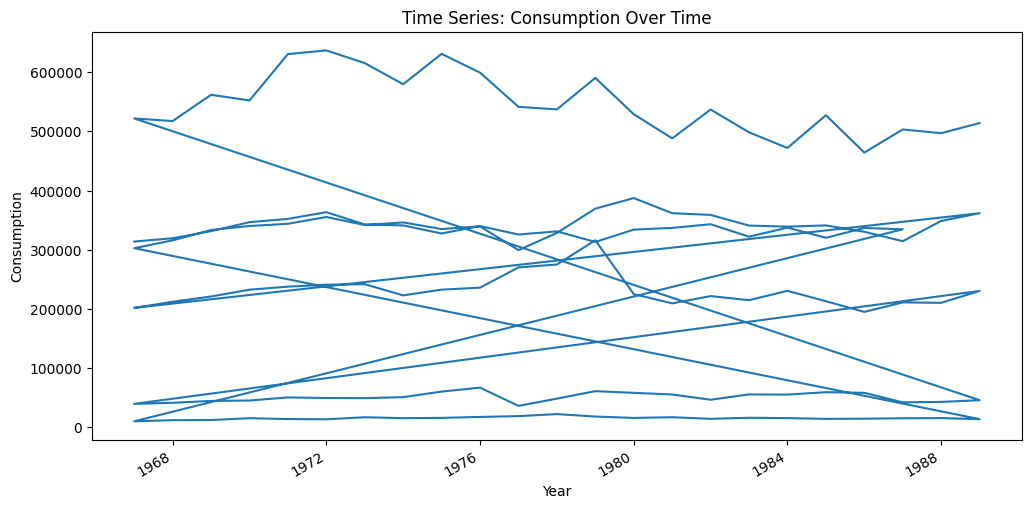

In [ ]:
# Time series plot for consumption
df_time['consumption'].plot(figsize=(12, 6))
plt.title("21BDS0100 Time Series: Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.show()

7.5 Decompose the Dataset

We’ll decompose the time series into trend, seasonality, and residuals using statsmodels.

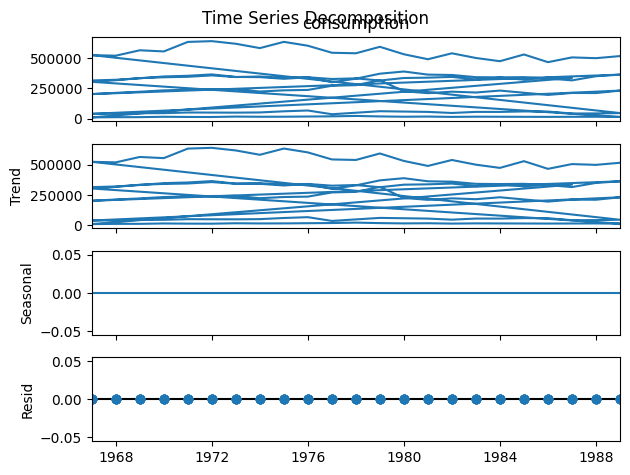

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df_time['consumption'], model='additive', period=1)
decomposition.plot()
plt.suptitle("21BDS0100 Time Series Decomposition")
plt.show()

7.6 Make the Dataset Stationary

We’ll check for stationarity and apply differencing if necessary.

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Sample data (replace with your actual time series data)
df_time = pd.DataFrame({
    'consumption': [10, 20, 30, 25, 40, 50, 60, 70, 90, 110]
})

# Check stationarity using the Augmented Dickey-Fuller test
result = adfuller(df_time['consumption'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If not stationary, apply differencing
df_time['consumption_diff'] = df_time['consumption'].diff().dropna().reset_index(drop=True)

# Check stationarity again after differencing
result_diff = adfuller(df_time['consumption_diff'])
print("ADF Statistic (after differencing):", result_diff[0])
print("p-value (after differencing):", result_diff[1])


ADF Statistic: 4.37080402234236
p-value: 1.0
ADF Statistic (after differencing): nan
p-value (after differencing): nan


7.7 Plot Box Plot Across Categories

We’ll create a box plot to compare a variable (e.g., consumption) across categories (e.g., state).

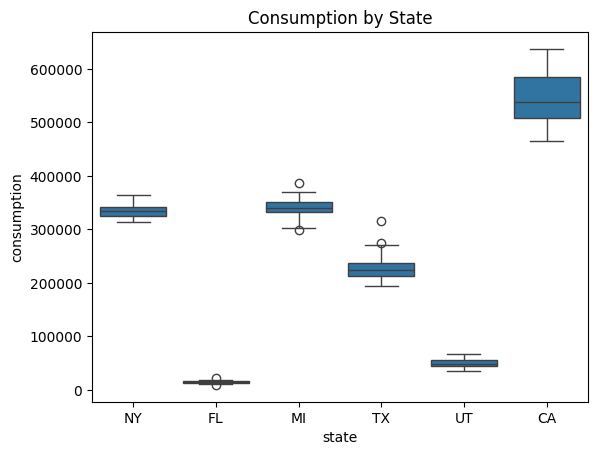

In [ ]:
# Box plot: Consumption by state
sns.boxplot(x='state', y='consumption', data=df)
plt.title("21BDS0100 Consumption by State")
plt.show()